## Loading and Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

/Users/rachelliao/anaconda3/envs/ensemble/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Load the dataset
df = pd.read_parquet('dataset/cleaned_data_before_eda.parquet')

## EDA

In [20]:
print(df['loan_status'].unique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)']


In [21]:
# Get the count of each unique value in 'loan_status' column
df['loan_status'].value_counts()

Fully Paid            14838
Charged Off            3711
Current                2285
Late (31-120 days)      116
In Grace Period          53
Late (16-30 days)        12
Name: loan_status, dtype: int64

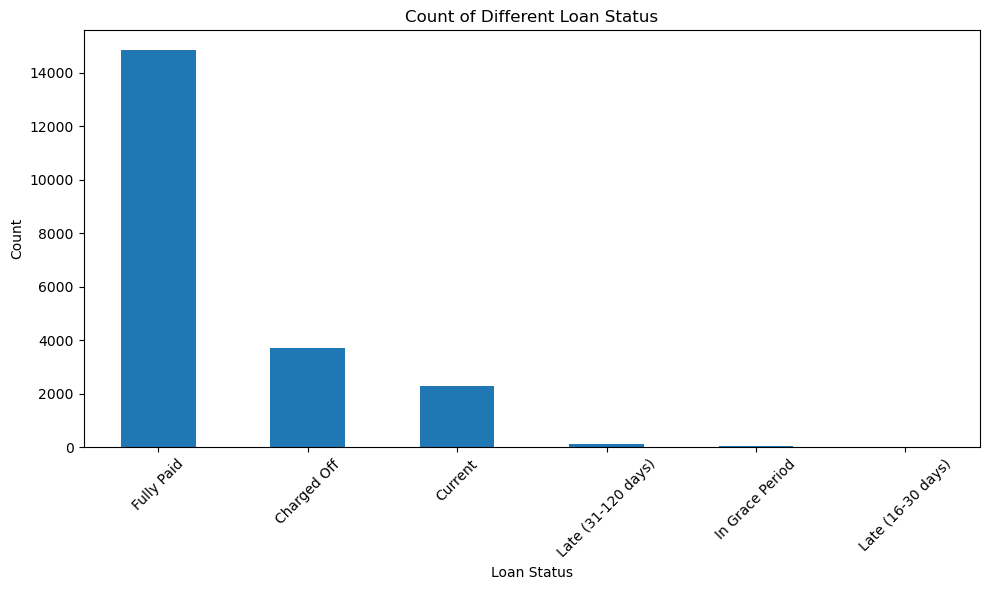

In [22]:
# Create a bar plot for the count of each unique value in 'loan_status' column
plt.figure(figsize=(10, 6))
df['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [23]:
# Get the percentage of each unique value in 'loan_status' column
df['loan_status'].value_counts() / len(df) * 100

Fully Paid            70.606709
Charged Off           17.658815
Current               10.873186
Late (31-120 days)     0.551987
In Grace Period        0.252201
Late (16-30 days)      0.057102
Name: loan_status, dtype: float64

In [24]:
# Drop the rows with 'Late (16-30 days)', 'Late (31-120 days)', and 'In Grace Period' values in 'loan_status' column
df = df[df['loan_status'] != 'Late (16-30 days)']
df = df[df['loan_status'] != 'Late (31-120 days)']
df = df[df['loan_status'] != 'In Grace Period']

# Check the shape of the dataframe
df.shape

(20834, 106)

In [25]:
# Create a new DataFrame with modified loan_status values
df_modified = df.copy()
df_modified['loan_status'] = df_modified['loan_status'].replace(['Fully Paid', 'Current'], 'Paid')
df_modified['loan_status'] = df_modified['loan_status'].replace(['Charged Off'], 'Default')

# Show the first 5 rows of the modified DataFrame
df_modified.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.000000,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.000000,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,6.458108,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000

In [26]:
# Get the count of each unique value in 'loan_status' column
df_modified['loan_status'].value_counts()

Paid       17123
Default     3711
Name: loan_status, dtype: int64

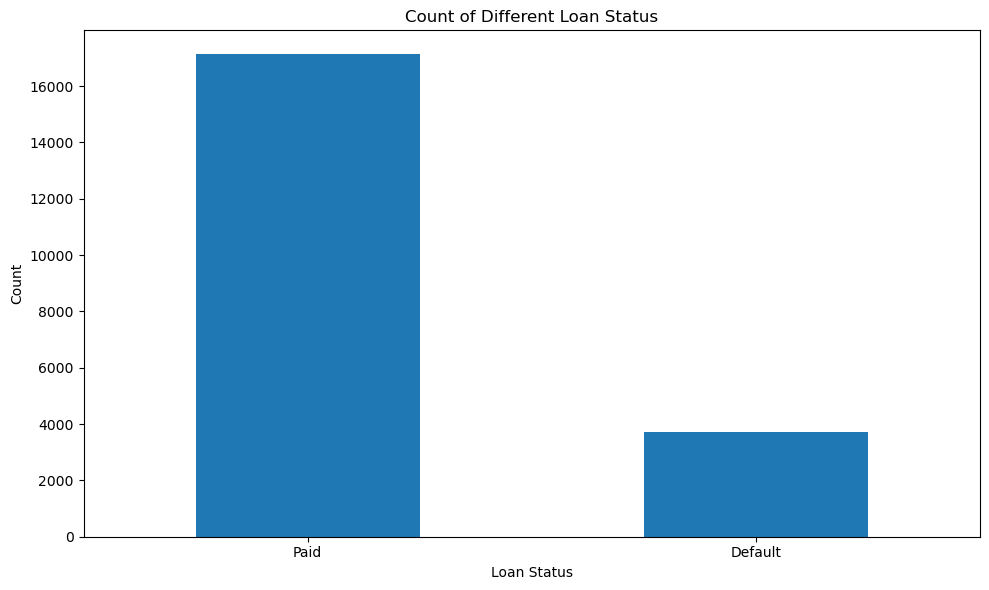

In [27]:
# Create a bar plot for count of values in the modified 'loan_status' column
plt.figure(figsize=(10, 6))
df_modified['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
# Get the percentage of each unique value in 'loan_status' column
df_modified['loan_status'].value_counts() / len(df_modified) * 100

Paid       82.18777
Default    17.81223
Name: loan_status, dtype: float64

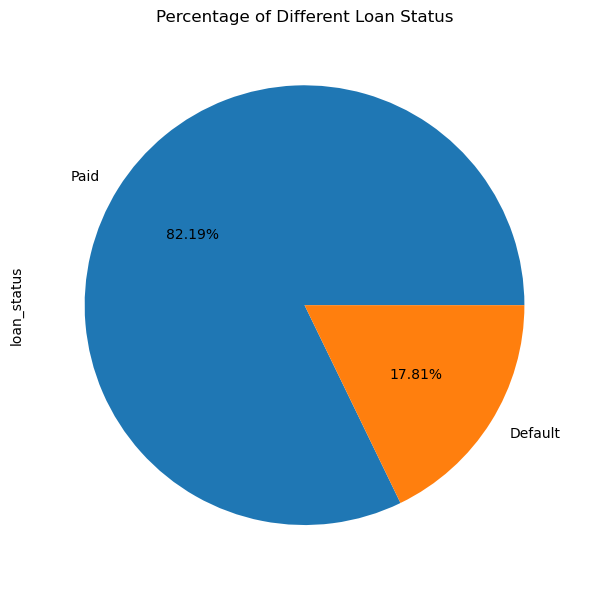

In [29]:
# Create a pie chart for the percentage of each unique value in the modified 'loan_status' column
plt.figure(figsize=(10, 6))
loan_status_counts = df_modified['loan_status'].value_counts()
loan_status_counts.plot(kind='pie', autopct='%1.2f%%')
plt.title('Percentage of Different Loan Status')
plt.tight_layout()
plt.show()

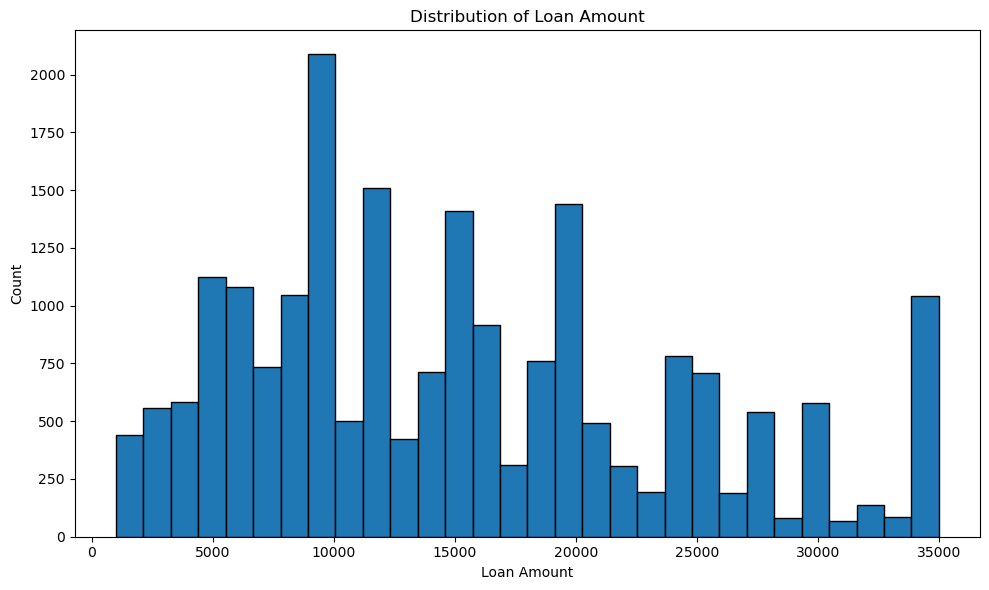

In [30]:
# Plot a histogram for the 'loan_amnt' column
plt.figure(figsize=(10, 6))
plt.hist(df_modified['loan_amnt'], bins=30, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.tight_layout()
plt.show()

The histogram shows the distribution of loan amounts in the dataset: 
- Most of the loans are in the range of $5,000 to $20,000.

In [31]:
# Create a list of numerical columns
num_cols = df_modified.select_dtypes(include=np.number).columns.tolist()

# Display the list of numerical columns
num_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_r

### Numerical Columns

In [32]:
# Create a list of high correlation features
high_corr_features = []

# Create two for loops to check the correlation and p-value between numerical columns
for col1 in num_cols:
    for col2 in num_cols:
        if col1 != col2:
            array1 = df_modified[col1].values
            array2 = df_modified[col2].values
            if np.var(array1) > 0 and np.var(array2) > 0:
                corr, p_value = stats.pearsonr(df_modified[col1], df_modified[col2])
                if corr > 0.5 and p_value < 0.05:
                    high_corr_features.append((col1, col2, corr, p_value))

# Create a dataframe from the list of high correlation features
high_corr_df = pd.DataFrame(high_corr_features, columns=['Feature_1', 'Feature_2', 'Correlation', 'P-Value'])

# Display the dataframe
high_corr_df

,Feature_1,Feature_2,Correlation,P-Value
0,loan_amnt,funded_amnt,1.000000,0.0
1,loan_amnt,funded_amnt_inv,0.999994,0.0
2,loan_amnt,installment,0.943674,0.0
3,loan_amnt,total_pymnt,0.871308,0.0
4,loan_amnt,total_pymnt_inv,0.871280,0.0
5,loan_amnt,total_rec_prncp,0.772013,0.0
6,loan_amnt,total_rec_int,0.682632,0.0
7,funded_amnt,loan_amnt,1.000000,0.0
8,funded_amnt,funded_amnt_inv,0.999994,0.0
9,funded_amnt,installment,0.943674,0.0


In [33]:
# Create a correlation matrix
corr_matrix = df_modified[num_cols].corr()
corr_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,1.000000,0.999994,0.165316,0.943674,0.326729,0.039956,-0.037570,0.121377,0.121372,-0.022722,0.181298,-0.071383,0.328374,0.119163,0.199929,0.293921,0.293918,0.871308,0.871280,0.772013,0.682632,0.085074,0.170867,0.169641,0.406865,0.069896,0.063883,-0.039856,NaN,-0.004979,-0.013934,0.292655,-0.037619,0.012893,-0.019160,0.014659,-0.000715,0.119663,-0.102621,-0.046275,-0.024290,0.398203,0.005511,0.350269,0.002960,0.067625,0.003337,0.001495,0.203207,0.189347,0.058648,-0.008591,-0.007011,0.127460,0.190547,0.045809,0.031740,0.223290,0.030220,-0.002348,-0.060734,0.209518,0.172318,0.230783,0.210563,0.061642,0.174519,0.180652,0.167693,0.181279,0.001767,-0.007089,-0.038563,-0.036155,0.107219,0.023083,-0.099194,-0.003517,0.321981,0.258012,0.372222,0.184609
funded_amnt,1.000000,1.000000,0.999994,0.165316,0.943674,0.326729,0.039956,-0.037570,0.121377,0.121372,-0.022722,0.181298,-0.071383,0.328374,0.119163,0.199929,0.293921,0.293918,0.871308,0.871280,0.772013,0.682632,0.085074,0.170867,0.169641,0.406865,0.069896,0.063883,-0.039856,NaN,-0.004979,-0.013934,0.292655,-0.037619,0.012893,-0.019160,0.014659,-0.000715,0.119663,-0.102621,-0.046275,-0.024290,0.398203,0.005511,0.350269,0.002960,0.067625,0.003337,0.001495,0.203207,0.189347,0.058648,-0.008591,-0.007011,0.127460,0.190547,0.045809,0.031740,0.223290,0.030220,-0.002348,-0.060734,0.209518,0.172318,0.230783,0.210563,0.061642,0.174519,0.180652,0.167693,0.181279,0.001767,-0.007089,-0.038563,-0.036155,0.107219,0.023083,-0.099194,-0.003517,0.321981,0.258012,0.372222,0.184609
funded_amnt_inv,0.999994,0.999994,1.000000,0.164705,0.943645,0.326842,0.039725,-0.037631,0.121677,0.121672,-0.022816,0.181266,-0.071433,0.328391,0.118970,0.199959,0.293885,0.293885,0.871344,0.871328,0.772152,0.682387,0.085026,0.170717,0.169489,0.406873,0.070145,0.064101,-0.039876,NaN,-0.004996,-0.013932,0.292690,-0.037733,0.012856,-0.019299,0.014524,-0.000623,0.119629,-0.102703,-0.046411,-0.024408,0.398305,0.005309,0.350408,0.002875,0.067660,0.003207,0.001324,0.203241,0.189554,0.058458,-0.008603,-0.007006,0.127508,0.190696,0.045886,0.031859,0.223343,0.030282,-0.002272,-0.060821,0.209473,0.172211,0.230825,0.210640,0.061607,0.174501,0.180716,0.167575,0.181246,0.001783,-0.007118,-0.038601,-0.036340,0.107276,0.022881,-0.099149,-0.003630,0.322041,0.257992,0.372415,0.184594
int_rate,0.165316,0.165316,0.164705,1.000000,0.143793,-0.108507,0.222624,0.035244,-0.388214,-0.388212,0.249890,-0.015915,0.071544,-0.054173,0.203092,-0.040721,0.157436,0.157327,0.083724,0.083192,-0.073938,0.456869,0.076645,0.188080,0.188483,0.088274,-0.369591,-0.293472,0.027055,NaN,0.017675,0.017020,-0.094419,0.219454,0.037745,0.237065,0.191964,-0.121877,0.048887,0.168338,0.173992,0.170158,-0.101453,0.276753,-0.199481,0.166565,0.022511,0.251421,0.231333,-0.086231,

In [34]:
# Select the top 10 variables with the highest correlation values overall
top_10_corr_features = corr_matrix['loan_amnt'].sort_values(ascending=False).head(11).to_frame()
top_10_corr_features

,loan_amnt
loan_amnt,1.000000
funded_amnt,1.000000
funded_amnt_inv,0.999994
installment,0.943674
total_pymnt,0.871308
total_pymnt_inv,0.871280
total_rec_prncp,0.772013
total_rec_int,0.682632
last_pymnt_amnt,0.406865
max_bal_bc,0.398203


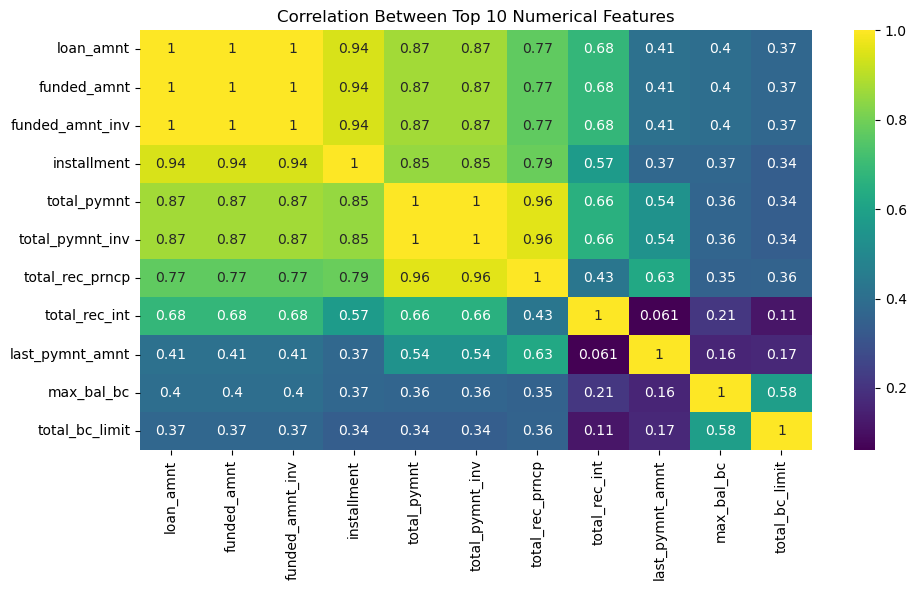

In [35]:
# Create a correlation matrix
top_10_corr_features = df_modified[top_10_corr_features.index].corr()

# Create a heatmap to visualize the correlation between the top 10 numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_corr_features, annot=True, cmap='viridis')
plt.title('Correlation Between Top 10 Numerical Features')
plt.tight_layout()
plt.show()

In [36]:
# Create a set to store the features to be removed
features_to_remove = set()

#Iterate over the high correlation dataframe
for index, row in high_corr_df.iterrows():
    feature_1 = row['Feature_1']
    feature_2 = row['Feature_2']

    # Add the feature with lower variance to the set
    if np.var(df_modified[feature_1].values) > np.var(df_modified[feature_2].values):
        features_to_remove.add(feature_2)
    else:
        features_to_remove.add(feature_1)

# Remove the features from the dataframe
df_selected_features = df_modified.drop(columns=features_to_remove)

# Display the features to be removed
features_to_remove

{'all_util',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'collection_recovery_fee',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'inq_fi',
 'installment',
 'last_fico_range_high',
 'last_pymnt_amnt',
 'loan_amnt',
 'max_bal_bc',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'out_prncp_inv',
 'pub_rec_bankruptcies',
 'revol_bal',
 'revol_util',
 'tax_liens',
 'tot_cur_bal',
 'total_bal_ex_mort',
 'total_bal_il',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim'}

In [37]:
# display which numercial features were left
df_selected_features.select_dtypes(include=np.number).columns.tolist()

['int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_late_fee',
 'recoveries',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'mths_since_rcnt_il',
 'il_util',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_tl_120dpd_2m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim']

In [38]:
# Display the shape of the dataframe
df_selected_features.shape

(20834, 55)

### Categorical Columns

In [39]:
# Create a list of categorical columns
cat_cols = df_selected_features.select_dtypes(include='object').columns.tolist()

# Display the list of categorical columns
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [40]:
# Initialize lists to store significant categorical columns and their p-values
significant_cat_cols = []
p_values = []

# Iterate over the categorical columns
for col in cat_cols:
    # Skip 'loan_status' column
    if col == 'loan_status':
        continue

    # Create a crosstab between the categorical column and 'loan_status' column
    crosstab = pd.crosstab(df_selected_features[col], df_selected_features['loan_status'])
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)
    
    # Check if the p-value is less than 0.05
    if p_value < 0.05:
        significant_cat_cols.append(col)
        p_values.append(p_value)

# Create a dataframe from the lists
chi2_df = pd.DataFrame({'Feature': significant_cat_cols, 'P-Value': p_values})

# Display the dataframe
chi2_df

,Feature,P-Value
0,term,5.451080e-58
1,grade,3.118026e-298
2,sub_grade,2.085448e-298
3,home_ownership,1.450835e-27
4,verification_status,1.819937e-44
5,purpose,1.803125e-14
6,title,2.975891e-14
7,addr_state,7.983931e-03
8,earliest_cr_line,1.644550e-02
9,initial_list_status,3.106177e-04


In [41]:
# drop all the features from chi2_df from the df_selected_features dataframe
df_selected_features.drop(columns=chi2_df['Feature'].values, inplace=True)

# display which categorical columns were left
categorical_cols = df_selected_features.select_dtypes(include='object').columns.tolist()
categorical_cols

['emp_title',
 'emp_length',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'zip_code',
 'application_type',
 'hardship_flag',
 'disbursement_method']

In [42]:
# check number of unique values in each categorical column
df_selected_features[categorical_cols].nunique()

emp_title              10863
emp_length                11
issue_d                    1
loan_status                2
pymnt_plan                 1
url                    20834
zip_code                 832
application_type           2
hardship_flag              1
disbursement_method        1
dtype: int64

In [43]:
# drop the columns with more than 11 unique values
categorical_cols = df_selected_features.drop(columns=['emp_title', 'url', 'zip_code'], inplace=True)

# display which categorical columns were left
categorical_cols = df_selected_features.select_dtypes(include='object').columns.tolist()
categorical_cols

['emp_length',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'application_type',
 'hardship_flag',
 'disbursement_method']

In [44]:
# Display the shape of the dataframe
df_selected_features.shape

(20834, 39)

In [45]:
# Check for missing values in the dataframe
missing_values = df_selected_features.isnull().sum()
print(missing_values)

int_rate                      0
emp_length                    0
annual_inc                    0
issue_d                       0
loan_status                   0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
pub_rec                       0
total_acc                     0
out_prncp                     0
total_pymnt                   0
total_rec_late_fee            0
recoveries                    0
last_fico_range_low           0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
mths_since_rcnt_il            0
il_util                       0
total_cu_tl                   0
inq_last_12m                  0
acc_open_past_24mths          0
chargeoff_within_12_mths      0
delinq_amnt                   0
mo_sin_old_il_acct            0
mo_sin_old_rev_tl_op          0
mths_since_recent_bc          0
mths_sin

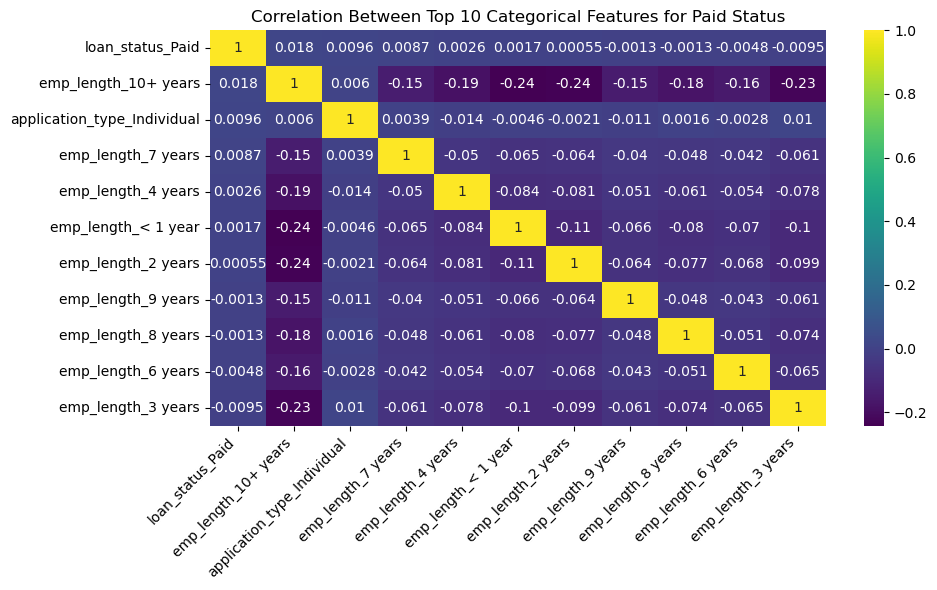

In [46]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Identify the remaining categorical columns
categorical_cols = df_selected_features.select_dtypes(include='object').columns.tolist()

# Perform one-hot encoding using OneHotEncoder
encoded_features = ohe.fit_transform(df_selected_features[categorical_cols])

# Create a new dataframe with the encoded features
df_encoded = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out(), dtype=int)

# Select the top 10 variables with the highest correlation values with loan_status_Paid
top_10_corr_features1 = df_encoded.corr()['loan_status_Paid'].sort_values(ascending=False).head(11).to_frame()
top_10_corr_features1

# Create a correlation matrix
top_10_corr_features1 = df_encoded[top_10_corr_features1.index].corr()

# Create a heatmap to visualize the correlation between the top 10 categorical columns for loan_status_Paid
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_corr_features1, annot=True, cmap='viridis')
plt.title('Correlation Between Top 10 Categorical Features for Paid Status')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

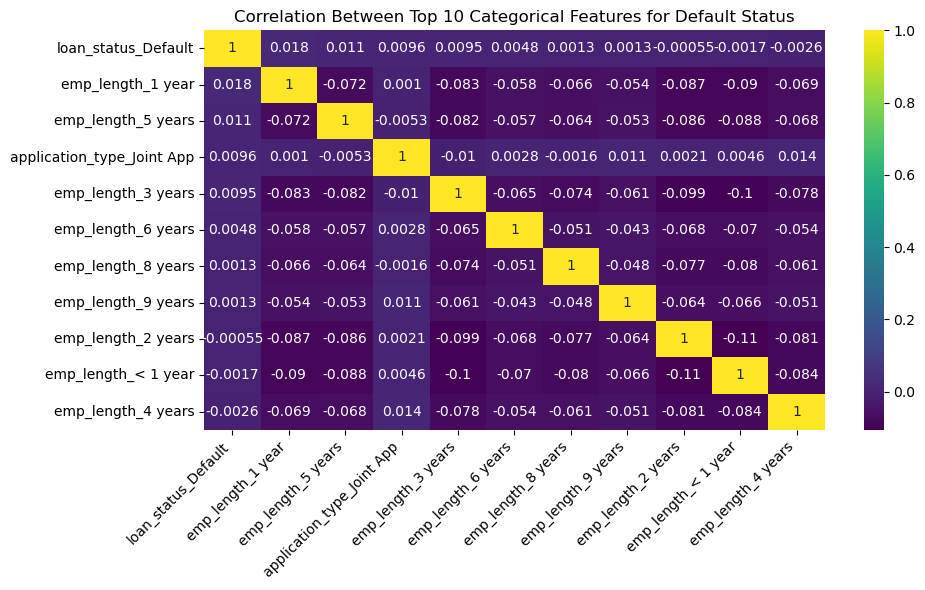

In [47]:
# Select the top 10 variables with the highest correlation values with loan_status_Default
top_10_corr_features2 = df_encoded.corr()['loan_status_Default'].sort_values(ascending=False).head(11).to_frame()
top_10_corr_features2

# Create a correlation matrix
top_10_corr_features2 = df_encoded[top_10_corr_features2.index].corr()

# Create a heatmap to visualize the correlation between the top 10 categorical columns for loan_status_Default
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_corr_features2, annot=True, cmap='viridis')
plt.title('Correlation Between Top 10 Categorical Features for Default Status')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [48]:
# Concatenate the encoded dataframe with the original numeric columns
df_encoded = pd.concat([df_selected_features.select_dtypes(exclude='object'), df_encoded], axis=1)

# Show
df_encoded.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,total_acc,out_prncp,total_pymnt,total_rec_late_fee,recoveries,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,mths_since_rcnt_il,il_util,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_tl_120dpd_2m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,issue_d_Dec-2015,loan_status_Default,loan_status_Paid,pymnt_plan_n,application_type_Individual,application_type_Joint App,hardship_flag_N,disbursement_method_Cash
0,13.99,55000.0,5.91,0.0,1.0,0.0,13.0,0.00,4421.723917,0.0,0.0,560.0,0.0,1.0,0.0,722.0,21.0,36.0,1.0,4.0,4.0,0.0,0.0,148.0,128.0,4.0,4.000000,2.0,0.0,76.9,0.0,178050.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,11.99,65000.0,16.06,1.0,4.0,0.0,38.0,0.00,25679.660000,0.0,0.0,695.0,0.0,1.0,0.0,0.0,19.0,73.0,0.0,6.0,4.0,0.0,0.0,113.0,192.0,2.0,0.000000,0.0,0.0,97.4,7.7,314017.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,14.85,110000.0,17.06,0.0,0.0,0.0,17.0,15897.65,31464.010000,0.0,0.0,675.0,0.0,1.0,0.0,0.0,23.0,70.0,1.0,0.0,2.0,0.0,0.0,36.0,87.0,2.0,6.458108,0.0,0.0,100.0,0.0,381215.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,22.45,104433.0,25.37,1.0,3.0,0.0,35.0,0.00,11740.500000,0.0,0.0,700.0,0.0,1.0,0.0,0.0,14.0,84.0,1.0,3.0,10.0,0.0,0.0,128.0,210.0,4.0,1.000000,0.0,0.0,96.6,60.0,439570.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
5,13.44,34000.0,10.20,0.0,0.0,0.0,6.0,0.00,13708.948530,0.0,0.0,755.0,0.0,1.0,0.0,0.0,338.0,99.0,0.0,0.0,0.0,0.0,0.0,338.0,54.0,36.0,6.458108,0.0,0.0,100.0,100.0,16900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [49]:
# Rename the column
df_encoded.rename(columns={'emp_length_< 1 year': 'emp_length_less_than_1_year'}, inplace=True)

In [50]:
# Check for missing values in the dataframe
missing_values = df_encoded.isnull().sum()
print(missing_values)

int_rate                       1557
annual_inc                     1557
dti                            1557
delinq_2yrs                    1557
inq_last_6mths                 1557
pub_rec                        1557
total_acc                      1557
out_prncp                      1557
total_pymnt                    1557
total_rec_late_fee             1557
recoveries                     1557
last_fico_range_low            1557
collections_12_mths_ex_med     1557
policy_code                    1557
acc_now_delinq                 1557
tot_coll_amt                   1557
mths_since_rcnt_il             1557
il_util                        1557
total_cu_tl                    1557
inq_last_12m                   1557
acc_open_past_24mths           1557
chargeoff_within_12_mths       1557
delinq_amnt                    1557
mo_sin_old_il_acct             1557
mo_sin_old_rev_tl_op           1557
mths_since_recent_bc           1557
mths_since_recent_inq          1557
num_accts_ever_120_pd       

In [51]:
# Check the percentage of missing values in each column
df_encoded.isnull().sum() / len(df_encoded) * 100


int_rate                       6.953687
annual_inc                     6.953687
dti                            6.953687
delinq_2yrs                    6.953687
inq_last_6mths                 6.953687
pub_rec                        6.953687
total_acc                      6.953687
out_prncp                      6.953687
total_pymnt                    6.953687
total_rec_late_fee             6.953687
recoveries                     6.953687
last_fico_range_low            6.953687
collections_12_mths_ex_med     6.953687
policy_code                    6.953687
acc_now_delinq                 6.953687
tot_coll_amt                   6.953687
mths_since_rcnt_il             6.953687
il_util                        6.953687
total_cu_tl                    6.953687
inq_last_12m                   6.953687
acc_open_past_24mths           6.953687
chargeoff_within_12_mths       6.953687
delinq_amnt                    6.953687
mo_sin_old_il_acct             6.953687
mo_sin_old_rev_tl_op           6.953687


In [52]:
# Drop the missing values for object columns
df_encoded.dropna(inplace=True)

# Check for missing values in the dataframe
missing_values = df_encoded.isnull().sum()
print(missing_values)

int_rate                       0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
pub_rec                        0
total_acc                      0
out_prncp                      0
total_pymnt                    0
total_rec_late_fee             0
recoveries                     0
last_fico_range_low            0
collections_12_mths_ex_med     0
policy_code                    0
acc_now_delinq                 0
tot_coll_amt                   0
mths_since_rcnt_il             0
il_util                        0
total_cu_tl                    0
inq_last_12m                   0
acc_open_past_24mths           0
chargeoff_within_12_mths       0
delinq_amnt                    0
mo_sin_old_il_acct             0
mo_sin_old_rev_tl_op           0
mths_since_recent_bc           0
mths_since_recent_inq          0
num_accts_ever_120_pd          0
num_tl_120dpd_2m               0
pct_tl_nvr_dlq                 0
percent_bc

In [ ]:
# Save the data to a parquet file
df_encoded.to_parquet('dataset/cleaned_data_after_eda.parquet')